In [4]:
import pandas as pd 

bike_day = pd.read_csv('day.csv')


In [5]:
import statsmodels.api as sm

temp_predictor = bike_day['temp']
temp_predictor = sm.add_constant(temp_predictor)
bikers = bike_day['cnt']

model = sm.OLS(bikers,temp_predictor)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           2.81e-81
Time:                        22:28:52   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1214.6421    161.164      7.537      0.0

In [7]:
lowest_temp = bike_day['temp'].min()
print(lowest_temp)
prediction = lowest_temp*6640.71+1214.6421
print(prediction)


0.0591304
1607.309938584


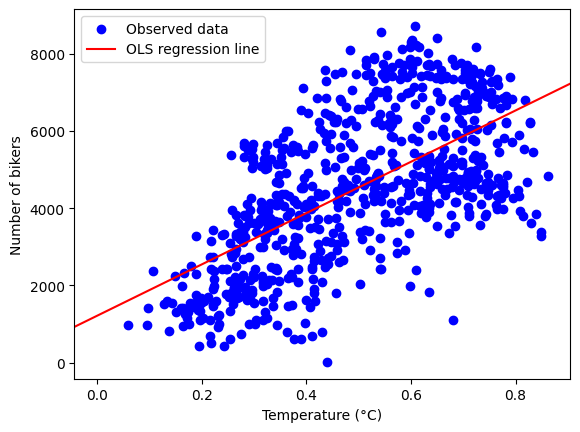

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Scatter plot of predictor vs response
ax.scatter(bike_day['temp'], bike_day['cnt'], color="blue", label="Observed data")

# Extract slope and intercept from OLS model
intercept, slope = results.params

# Plot regression line with ax.axline
ax.axline((0, intercept), slope=slope, color="red", label="OLS regression line")

# Labels and legend
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Number of bikers")
ax.legend()

plt.show()


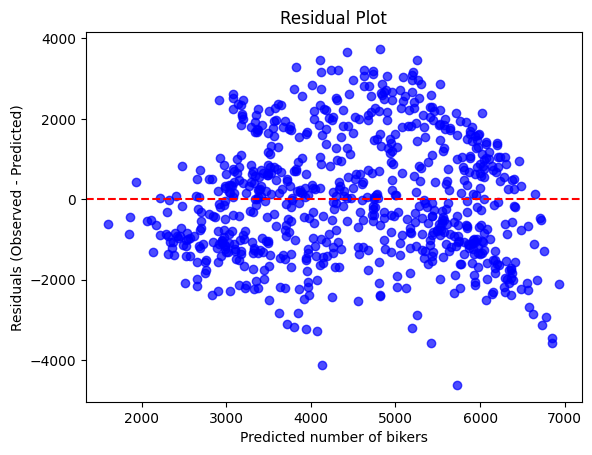

In [11]:
# Predicted values from the OLS model
y_pred = results.predict(temp_predictor)

# Residuals
residuals = bike_day['cnt'] - y_pred

fig, ax = plt.subplots()

# Residuals vs predicted
ax.scatter(y_pred, residuals, color="blue", alpha=0.7)

# Add a horizontal line at 0 for reference
ax.axhline(0, color="red", linestyle="--")

# Labels
ax.set_xlabel("Predicted number of bikers")
ax.set_ylabel("Residuals (Observed - Predicted)")
ax.set_title("Residual Plot")

plt.show()


In [14]:

import numpy as np
# Load data (assuming bikeshare.csv has 'hr' and 'bikers' etc.)
bike_hour = pd.read_csv("hour.csv")
# Ensure hr is numeric
bike_hour['hr'] = pd.to_numeric(bike_hour['hr'], errors='coerce')

# Select only numeric columns
numeric_cols = bike_hour.select_dtypes(include=[np.number])

# Correlation matrix only for numeric vars
corr_matrix = numeric_cols.corr()
print(corr_matrix)


             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

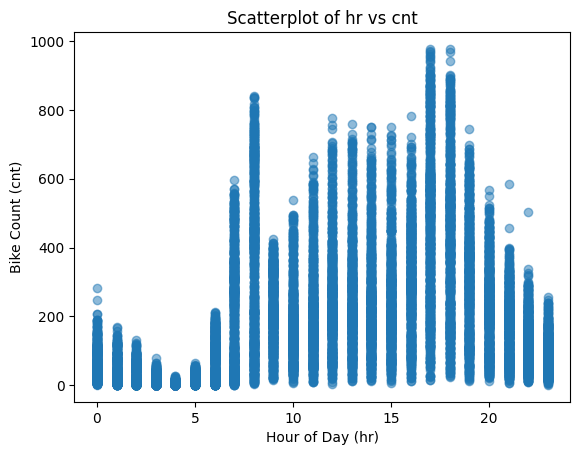

In [15]:


plt.scatter(bike_hour['hr'], bike_hour['cnt'], alpha=0.5)
plt.xlabel("Hour of Day (hr)")
plt.ylabel("Bike Count (cnt)")
plt.title("Scatterplot of hr vs cnt")
plt.show()


In [16]:


# Predictor and response
X = sm.add_constant(bike_hour[['hr']])   # add intercept
y = bike_hour['cnt']

# Fit OLS model
model1 = sm.OLS(y, X).fit()

# Results
print(model1.summary())

# Predictions and MSE
y_pred1 = model1.predict(X)
mse1 = np.mean((y - y_pred1) ** 2)
print("MSE (linear hr model):", mse1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3195.
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:07:24   Log-Likelihood:            -1.1357e+05
No. Observations:               17379   AIC:                         2.272e+05
Df Residuals:                   17377   BIC:                         2.272e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.0952      2.462     28.475      0.0

In [17]:
# Add squared term
bike_hour['hr2'] = bike_hour['hr'] ** 2

# Predictors: hr and hr² + intercept
X2 = sm.add_constant(bike_hour[['hr', 'hr2']])
y = bike_hour['cnt']

# Fit OLS model
model2 = sm.OLS(y, X2).fit()

# Results
print(model2.summary())

# Predictions and MSE
y_pred2 = model2.predict(X2)
mse2 = np.mean((y - y_pred2) ** 2)
print("MSE (quadratic hr model):", mse2)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     3677.
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:14:23   Log-Likelihood:            -1.1197e+05
No. Observations:               17379   AIC:                         2.240e+05
Df Residuals:                   17376   BIC:                         2.240e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -65.1308      3.201    -20.349      0.0

In [18]:
# Create interaction term
bike_hour['hr_workday'] = bike_hour['hr'] * bike_hour['workingday']

# Predictors
X3 = sm.add_constant(bike_hour[['hr', 'hr2', 'workingday', 'hr_workday']])
y = bike_hour['cnt']

# Fit OLS model
model3 = sm.OLS(y, X3).fit()

# Results
print(model3.summary())

# Predictions and MSE
y_pred3 = model3.predict(X3)
mse3 = np.mean((y - y_pred3) ** 2)
print("MSE (with hr, hr2, workingday, hr×workingday):", mse3)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     1854.
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:16:09   Log-Likelihood:            -1.1195e+05
No. Observations:               17379   AIC:                         2.239e+05
Df Residuals:                   17374   BIC:                         2.240e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.6390      4.579    -13.024      0.0

In [19]:
# Add temp to predictors
X4 = sm.add_constant(bike_hour[['hr', 'hr2', 'workingday', 'hr_workday', 'temp']])
y = bike_hour['cnt']

# Fit OLS model
model4 = sm.OLS(y, X4).fit()

# Results
print(model4.summary())

# Predictions and MSE
y_pred4 = model4.predict(X4)
mse4 = np.mean((y - y_pred4) ** 2)
print("MSE (with hr, hr2, workingday, hr×workingday, temp):", mse4)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     2311.
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:17:19   Log-Likelihood:            -1.1061e+05
No. Observations:               17379   AIC:                         2.212e+05
Df Residuals:                   17373   BIC:                         2.213e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -180.4894      4.796    -37.633      0.0